## 基于依存关系的分析
在基于依存关系的分析中,我们会**使用依存语法**来**分析和推断**语句中**每个标识在结构上和语义上的关系**..

基于依存关系的语法可以帮助我们**使用依存标签标注句子**.

依存标签是标识之间的**一对一的映射**,表示标识之间的依存关系.

基于依存语法的**分析树是一个有标签且有方向的树或图**,可以更加精确地表示语句.

分析树中的节点始终是词汇类型的标识,有标签的边表示起始点及其从属项(依赖起始点的标识)的依存关系.

有向边上的标签表示依存关系中的语法角色.

在本节中,我们将介绍一些基于依存语法的分析,使我们进一步了解文本标识之间的句法和语义.

### 依存关系分析器推荐
接下来我们使用几个库生成基于依存关系的分析树,并对我们的例句进行测试.

首先,我们将使用spacy库来分析我们的例句,生成所有标识及其依存关系.

In [10]:
sentence = 'The brown fox is quick and he is jumping over the lazy dog'

#from spacy.lang.en import English
import spacy

nlp = spacy.load('en_core_web_sm')
parsed_sent = nlp(unicode(sentence))

#parser = English()
#parsed_sent = parser(unicode(sentence))

dependency_pattern = '{left}<---{word}[{w_type}]--->{right}\n--------'

#for token in parsed_sent:
#    print dependency_pattern.format(word=token.orth_,
#                                   w_type=token.dep_,
#                                   left=[t.orth_ for t in token.lefts],
#                                   right=[t.orth_ for t in token.rights])
    
for token in parsed_sent:
    print dependency_pattern.format(word=token.orth_,
                                   w_type=token.dep_,
                                   left=[t.orth_ for t in token.lefts],
                                   right=[t.orth_ for t in token.rights])

[]<---The[det]--->[]
--------
[]<---brown[amod]--->[]
--------
[u'The', u'brown']<---fox[nsubj]--->[]
--------
[u'fox']<---is[ROOT]--->[u'quick', u'and', u'jumping']
--------
[]<---quick[acomp]--->[]
--------
[]<---and[cc]--->[]
--------
[]<---he[nsubj]--->[]
--------
[]<---is[aux]--->[]
--------
[u'he', u'is']<---jumping[conj]--->[u'over']
--------
[]<---over[prep]--->[u'dog']
--------
[]<---the[det]--->[]
--------
[]<---lazy[amod]--->[]
--------
[u'the', u'lazy']<---dog[pobj]--->[]
--------


上面的输出显示了所有的标识及其依存关系类型,左箭头指向其左侧的依存项,右箭头指向其右侧的依存项.

关于每个依存标签所代表的含义,请参阅第一章.

接下来,我们将使用nltk和斯坦福分析器为例句生成依存关系树,代码段所示:

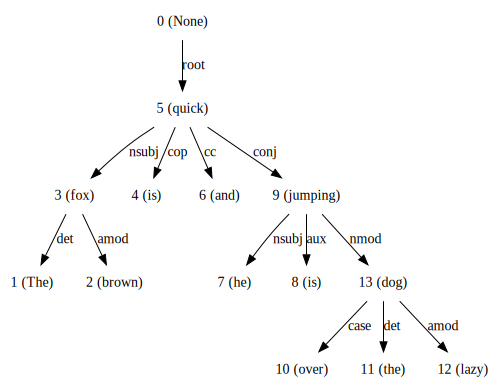

In [11]:
import os
java_path = r'/usr/bin/java'
os.environ['JAVAHOME'] = java_path

from nltk.parse.stanford import StanfordDependencyParser
sdp = StanfordDependencyParser(path_to_jar='/home/parallels/stanford-nlp/stanford-parser-full-2015-04-20/stanford-parser.jar', 
                               path_to_models_jar='/home/parallels/stanford-nlp/stanford-parser-full-2015-04-20/stanford-parser-3.5.2-models.jar')

result = list(sdp.raw_parse(sentence))
#generate annotated dependency parse tree
result[0]

In [12]:
#generate dependency triples
dep_tree = [parse.tree() for parse in result][0]
print dep_tree

(quick (fox The brown) is and (jumping he is (dog over the lazy)))


In [13]:
#visualize simple dependency parse tree
dep_tree.draw()

上面的输出结果展示了我们如何轻松地为例句生成依存分析树,并分析和理解标识间的关系.

斯坦福分析器是十分强大且稳定的,它能够很好地与nltk集成.

### 建立自己的依存关系分析器
从头开始构建自己的依存关系分析器并不容易,因为:
- 需要大量的,充足的数据
- 仅仅按照语法产生式规则来检查并不总是能够很好地评估分析器效果

1. 首先利用nltk的DependencyGrammar类从用户输入语法获得产生式规则.
2. 然后使用ProjectiveDependencyParser(一个映射式的,基于产生式规则的依存关系分析器)来执行基于依存关系的分析

In [15]:
import nltk
tokens = nltk.word_tokenize(sentence)

dependency_rules = """
'fox' -> 'The'|'brown'
'quick' -> 'fox'|'is'|'and'|'jumping'
'jumping' -> 'he' | 'is' | 'dog'
'dog' -> 'over' | 'the' | 'lazy'
"""

dependency_grammar = nltk.grammar.DependencyGrammar.fromstring(dependency_rules)
print dependency_grammar

#build dependency parser
dp = nltk.ProjectiveDependencyParser(dependency_grammar)

#parse our sample sentence
res = [item for item in dp.parse(tokens)]
tree = res[0]

#print dependency parse tree
print tree

Dependency grammar with 12 productions
  'fox' -> 'The'
  'fox' -> 'brown'
  'quick' -> 'fox'
  'quick' -> 'is'
  'quick' -> 'and'
  'quick' -> 'jumping'
  'jumping' -> 'he'
  'jumping' -> 'is'
  'jumping' -> 'dog'
  'dog' -> 'over'
  'dog' -> 'the'
  'dog' -> 'lazy'
(quick (fox The brown) is and (jumping he is (dog over the lazy)))


In [16]:
#build dependency parser
dp = nltk.ProjectiveDependencyParser(dependency_grammar)
#parse our sample sentence
res = [item for item in dp.parse(tokens)]
tree = res[0]

#print dependency parse tree
print tree

(quick (fox The brown) is and (jumping he is (dog over the lazy)))


In [17]:
#f分析树可视化树形结构,并将其与上一个树形结构进行比较.
tree.draw()

## 基于成分结构的分析
基于成分结构的语法常用来分析和确定语句的组成成分.

这种语法的另一个重要用途是**找出这些组成成分的内部结构以及它们之间的关系**.

更多信息请参阅1.3.4节下的"成分语法"内容.

基于成分结构的语法可以帮助我们将句子分解成各种成分.

然后,将这些成分分解成更细的细分项,并且重复这个过程直至将各种成分分解成独立的标识或单词.

一般而言,一个与上下文语境无关的语法(CFG)或短语结构语法就足以完成上述操作.

分析器是为语法赋予生命的东西,也可以是语法的程序语言解释.

目前,有各种类型的分析算法,包括如下几类:

- 递归下降解析(Recursive Descent parsing)
- 移位归约解析(Shift Reduce parsing)
- 图表解析(Chart parsing)
- 自下而上解析(Bottom-up parsing)
- 自上而下解析(Top-down parsing)
- PCFG解析(PCFG parsing)
关于以上的分析算法,更加详细信息请参阅http://www.nltk.org/book/ch08.html

**递归下降解析**通常遵循自上而下的解析方法,它从输入语句中读取标识,然后尝试将其与语法产生式规则中的终结符进行匹配.

它始终超前一个标识,并在每次获得匹配时,将输入读取指针前移.

**移位归约解析**遵循自下而上的解析方法,它找出与语法产生式规则右侧一致的标识序列(单词或短语),然后用该规则左侧的标识替换它.

这个过程一直持续,直到整个句子只剩下形成分析树的必要项.

**图表解析**采用动态规划,它存储中间结果,并在需要是重新使用这些结果,以获得显著的效能提升.这种情况下,图表分析器存储部分解决方案,

并在需要时查找它们以获得完整的解决方案.

### 成分结构分析器推荐
使用nltk的StanfordParser来生成分析树.

In [18]:
sentence = 'The brown fox is quick and he is jumping over the lazy dog'

from nltk.parse.stanford import StanfordParser

scp = StanfordParser(path_to_jar='/home/parallels/stanford-nlp/stanford-parser-full-2015-04-20/stanford-parser.jar', 
                path_to_models_jar='/home/parallels/stanford-nlp/stanford-parser-full-2015-04-20/stanford-parser-3.5.2-models.jar')

#get parse tree
result = list(scp.raw_parse(sentence))

#print the constituency parse tree
print result[0]

(ROOT
  (NP
    (S
      (S
        (NP (DT The) (JJ brown) (NN fox))
        (VP (VBZ is) (ADJP (JJ quick))))
      (CC and)
      (S
        (NP (PRP he))
        (VP
          (VBZ is)
          (VP
            (VBG jumping)
            (PP (IN over) (NP (DT the) (JJ lazy) (NN dog)))))))))


In [19]:
#visualize constituency parse tree
result[0].draw()

上面的代码段向我们展示了如何为句子构建基于成分语法的分析树.

### 构建自己的成分结构分析器
构建自己的成分结构分析器有各种各样的方法,包括创建CFG产生式规则,然后使用该语法规则构建分析器等.

想要构建自己的CFG,你可以使用nltk.CFG.fromstring函数来输入产生式规则.

然后再使用ChartParser或RecursiveDescentParser分析器.

我们将会考虑构建一个扩展性良好且运行高效的成分结构分析器.

常规CFG分析器(如图表分析器,递归下降分析器)的问题是解析语句时很容易被大量的解析工作量所压垮,导致运行速度非常缓慢

PCFG(概率上下文无关语法)这样的加权语法和像维特比分析器这样的概率分析器在运行中被证明更有效的地方.

PCFG是一种上下文无关的语法,它将每个产生式规则与一个概率值相关联.

从PCFG产生一个分析树的概率是每一个产生式规则概率的乘积.

---------------------------------------
接下来使用nltk的ViterbiParser来训练treebank语料库中的分析器,treebank语料库为每个句子提供了带注释的分析树.

一个自下而上的PCFG分析器,它使用动态规划来查找每个步骤中最有可能的解析结果.

In [20]:
import nltk
from nltk.grammar import Nonterminal
from nltk.corpus import treebank

#get training data
training_set = treebank.parsed_sents()

#view a sample training sentence
print training_set[1]

(S
  (NP-SBJ (NNP Mr.) (NNP Vinken))
  (VP
    (VBZ is)
    (NP-PRD
      (NP (NN chairman))
      (PP
        (IN of)
        (NP
          (NP (NNP Elsevier) (NNP N.V.))
          (, ,)
          (NP (DT the) (NNP Dutch) (VBG publishing) (NN group))))))
  (. .))


In [21]:
#extract the productions for all annotated training sentences
treebank_productions = list(
    set(production for sent in training_set for production in sent.productions())
)

In [22]:
treebank_productions[0:10]

[VBZ -> 'cites',
 VBD -> 'spurned',
 PRN -> , ADVP-TMP ,,
 NNP -> 'ACCOUNT',
 JJ -> '36-day',
 NP-SBJ-2 -> NN,
 JJ -> 'unpublished',
 NP-SBJ-1 -> NNP,
 JJ -> 'elusive',
 NNS -> 'Lids']

In [23]:
for word, tag in treebank.tagged_words():
    t = nltk.Tree.fromstring("("+tag+" "+word+")")
    for production in t.productions():
        treebank_productions.append(production)
        
#build the PCFG based grammar
treebank_grammar = nltk.grammar.induce_pcfg(Nonterminal('S'), treebank_productions)

In [27]:
#通过语法训练创建自己的分析器,然后使用例句对分析器进行评估

#build the parser
viterbi_parser = nltk.ViterbiParser(treebank_grammar)

#get sample sentence tokens
tokens = nltk.word_tokenize(sentence)

#get parse tree
result = list(viterbi_parser.parse(tokens))

ValueError: Grammar does not cover some of the input words: u"'brown', 'fox', 'lazy', 'dog'".

以上代码报错的原因:例句中的一些单词不包含在基于treebank的语法中,因为这些单词并不在我们的treebank语料库中.

由于该语法使用POS标签和短语标签来构建基于训练数据的分析树,我们将在语法中为例句添加标识和POS标签,然后重新构建分析器

In [30]:
from pattern.en import tag as pos_tagger
tagged_sent = pos_tagger(sentence)

print tagged_sent

[(u'The', u'DT'), (u'brown', u'JJ'), (u'fox', u'NN'), (u'is', u'VBZ'), (u'quick', u'JJ'), (u'and', u'CC'), (u'he', u'PRP'), (u'is', u'VBZ'), (u'jumping', u'VBG'), (u'over', u'IN'), (u'the', u'DT'), (u'lazy', u'JJ'), (u'dog', u'NN')]


In [31]:
for word, tag in tagged_sent:
    t = nltk.Tree.fromstring("("+tag+" "+word+")")
    for production in t.productions():
        treebank_productions.append(production)
        
#rebuild grammar
treebank_parser = nltk.grammar.induce_pcfg(Nonterminal('S'), treebank_productions)

#rebuild parser
viterbi_parser = nltk.ViterbiParser(treebank_grammar)

#get parse tree for sample sentence
result = list(viterbi_parser.parse(tokens))

#print the constituency parse tree
print result[0]

ValueError: Grammar does not cover some of the input words: u"'brown', 'fox', 'lazy', 'dog'".